## Занятие 01. "Постановки задач машинного обучения и библиотеки"
Домашнее задание выполнено **Мельниковой Маргаритой**

---
### Задача
- Вам нужно сделать предобработку данных, аналогичную на занятии. 
- Расписывайте в Markdown ваши шаги, и почему вы взяли медину вместо среднего, например.
- Это покажет то, как вы рассуждаете.

#### Пояснение по столбцам:
- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA
---
### Решение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
url = 'https://drive.google.com/file/d/1dvXAx4sD4g3AfXzLvI_UcQAtQN70qOz-/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

data = pd.read_csv(path)

##### Знакомство с данными

In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


> Изучим значения переменных 'Age', 'Height', 'Weight'.

In [5]:
num_cols = ['Age', 'Height', 'Weight']

for col in num_cols:
    print(col, data[col].unique())

Age [24. 23. 34. 21. 25. 27. 31. 33. 18. 26. 22. 30. 32. 28. 54. 20. 17. 43.
 47. 29. 41. 45. 49. 53. 57. nan 19. 38. 35. 16. 37. 15. 42. 46. 40. 36.
 14. 39. 48. 52. 44. 55. 50. 71. 63. 51. 58. 13. 60. 75. 65. 56. 64. 68.
 84. 12. 72. 59. 61. 70. 74. 62. 67. 69. 73. 66. 11. 76. 88. 96. 80. 10.
 81. 77. 97.]
Height [180. 170.  nan 185. 188. 183. 168. 186. 182. 172. 159. 171. 184. 175.
 189. 176. 163. 187. 169. 174. 190. 194. 177. 167. 164. 198. 165. 156.
 179. 178. 166. 181. 155. 160. 173. 192. 195. 191. 203. 158. 154. 153.
 152. 193. 162. 197. 157. 207. 147. 150. 202. 161. 210. 205. 200. 148.
 208. 140. 213. 204. 151. 196. 146. 201. 132. 149. 199. 211. 215. 139.
 206. 135. 142. 217. 209. 145. 221. 144. 214. 143. 218. 127. 223. 216.
 141. 212. 131. 136. 137. 138. 220. 130. 219. 133. 128. 226.]
Weight [ 80.          60.                  nan  82.          75.
  72.          96.          76.5         70.          55.5
  65.          85.          64.         130.         125.
  89.        

> Значения переменных возраста и роста (в данном датасете) дискретны, вес - неприрывная величина. </br>
После обработки пропусков (np.nan - float) заменим тип на integer для возраста и роста.

##### Работа с дубликатами

In [6]:
# размерность до удаления дубликатов
data.shape

(271116, 15)

In [7]:
data = data.drop_duplicates()
# размерность после удаления дубликатов
data.shape

(269731, 15)

##### Работа с пропусками

> Доля пропущенных значений, %:

In [8]:
data.isnull().mean()*100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.453441
Height    21.804687
Weight    22.810504
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.254939
dtype: float64

> **Возраст ('Age')**

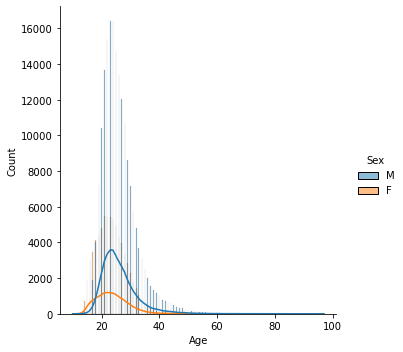

In [9]:
sns.displot(data=data, x='Age', hue='Sex', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

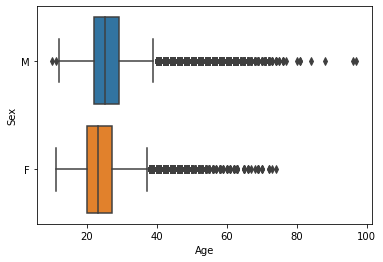

In [10]:
sns.boxplot(data=data, y="Sex", x="Age")

> Распределение возраста спортсменов зависит от пола. </br>
> Распределение спортсменов по возрасту скошено, поэтому для обработки пропусков возраста возьмем медиану в разрезе пола.

> **Рост ('Height')**

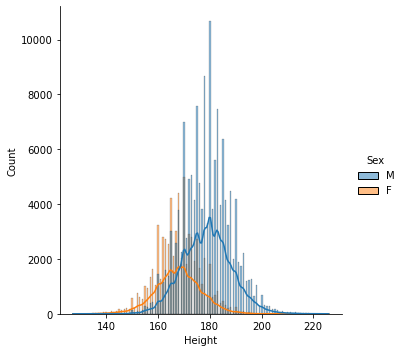

In [11]:
sns.displot(data=data, x='Height', hue='Sex', kde=True)

<AxesSubplot:xlabel='Height', ylabel='Sex'>

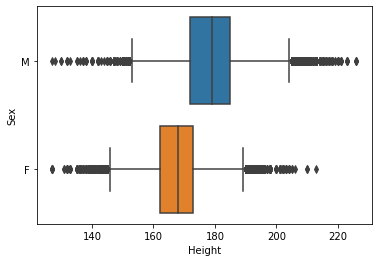

In [12]:
sns.boxplot(data=data, y="Sex", x="Height")

> Распределение роста спортсменов зависит от пола. </br>
> Распределение спортсменов по росту скошено, поэтому для обработки пропусков роста возьмем медиану в разрезе пола.

> **Вес ('Weight')**

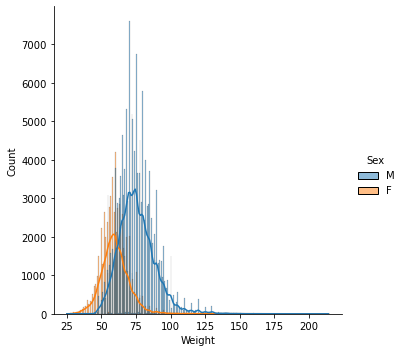

In [13]:
sns.displot(data=data, x='Weight', hue='Sex', kde=True)

<AxesSubplot:xlabel='Weight', ylabel='Sex'>

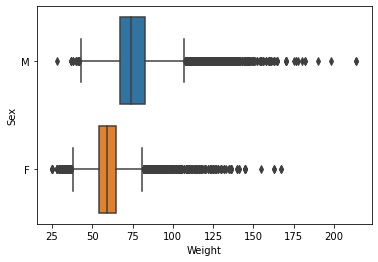

In [14]:
sns.boxplot(data=data, y="Sex", x="Weight")

In [15]:
data.groupby('Sex')[['Age', 'Height', 'Weight']].median()

,Age,Height,Weight
Sex,,,
F,23.0,168.0,59.0
M,25.0,179.0,74.0


> Распределение веса спортсменов зависит от пола. </br>
> Распределение спортсменов по весу скошено, поэтому для обработки пропусков веса возьмем медиану в разрезе пола.

> **Заполняем пропуски**

In [16]:
sex = ['M', 'F']
num_cols = ['Age', 'Height', 'Weight']

for s in sex:
    for col in num_cols:
        rows = (data['Sex'] == s)
        median = data.loc[rows, col].median()
        data.loc[rows, col] = data.loc[rows, col].fillna(median)

> **Проверим выполненное заполнение пропусков**

In [17]:
data.groupby('Sex')[['Age', 'Height', 'Weight']].median()

,Age,Height,Weight
Sex,,,
F,23.0,168.0,59.0
M,25.0,179.0,74.0


In [18]:
data.isnull().mean()*100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.000000
Height     0.000000
Weight     0.000000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.254939
dtype: float64

> Пропуски количественных переменных заполнены, статистика не изменилась (медиана). Значит, все хорошо

##### Работа с типами

> Изменим типы возраста и роста

In [19]:
num_cols = ['Age', 'Height']

for col in num_cols:
    data[col] = data[col].astype(int)

##### Смотрим, что получилось

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  int64  
 4   Height  269731 non-null  int64  
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 41.0+ MB


In [21]:
data.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.436090,175.851763,71.031087,1978.623073
std,39026.253843,6.057778,9.498628,12.839655,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,62.000000,1960.000000
50%,68233.000000,25.000000,178.000000,73.000000,1988.000000
75%,102111.000000,28.000000,180.000000,76.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000
